In [1]:
import astropy.units as u
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [2]:
# https://iaea-nds.github.io/lc_api_notebook/

import pandas as pd
import urllib
# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))


## Q1

In [3]:
Ene_init = 2*u.MeV
Ene_final = 0.025*u.eV
log_Ene_loss = np.log(Ene_init/Ene_final)
log_Ene_loss

<Quantity 18.19753719>

In [4]:
def ave_log_energe_loss(mass_number):
    alpha = ((mass_number-1)/(mass_number+1))**2
    xi = 1 + alpha/(1-alpha)*np.log(alpha)
    return xi

In [5]:
df=lc_pd_dataframe(livechart+"fields=ground_states&nuclides=1h")
df

,z,n,symbol,radius,unc_r,abundance,unc_a,energy_shift,energy,unc_e,...,unc_ba,atomic_mass,unc_am,massexcess,unc_me,me_systematics,discovery,ENSDFpublicationcut-off,ENSDFauthors,Extraction_date
0,1,0,H,0.8783,0.0086,99.9855,0.0078,NaN,0,NaN,...,0.0,1.007825e+06,0.000014,7288.971064,0.000013,N,1920,31-Oct-2005,BALRAJ SINGH,2024-04-20


In [6]:
# 1H
mass_H = df['atomic_mass'].values[0]*1e-6
print(mass_H)
xi_H = ave_log_energe_loss(mass_H)
print(xi_H)
N_scatter = log_Ene_loss/xi_H
print(N_scatter)

1.007825031898
0.9998314794744663
18.20060436805129


In [7]:
df=lc_pd_dataframe(livechart+"fields=ground_states&nuclides=235u")
df.to_csv('1.csv')

In [8]:
# 1H
mass_U235 = df['atomic_mass'].values[0]*1e-6
print(mass_U235)
xi_U235 = ave_log_energe_loss(mass_U235)
print(xi_U235)
N_scatter = log_Ene_loss/xi_U235
print(N_scatter)

235.043928117
0.008484964252735816
2144.6804783851276


## Q3

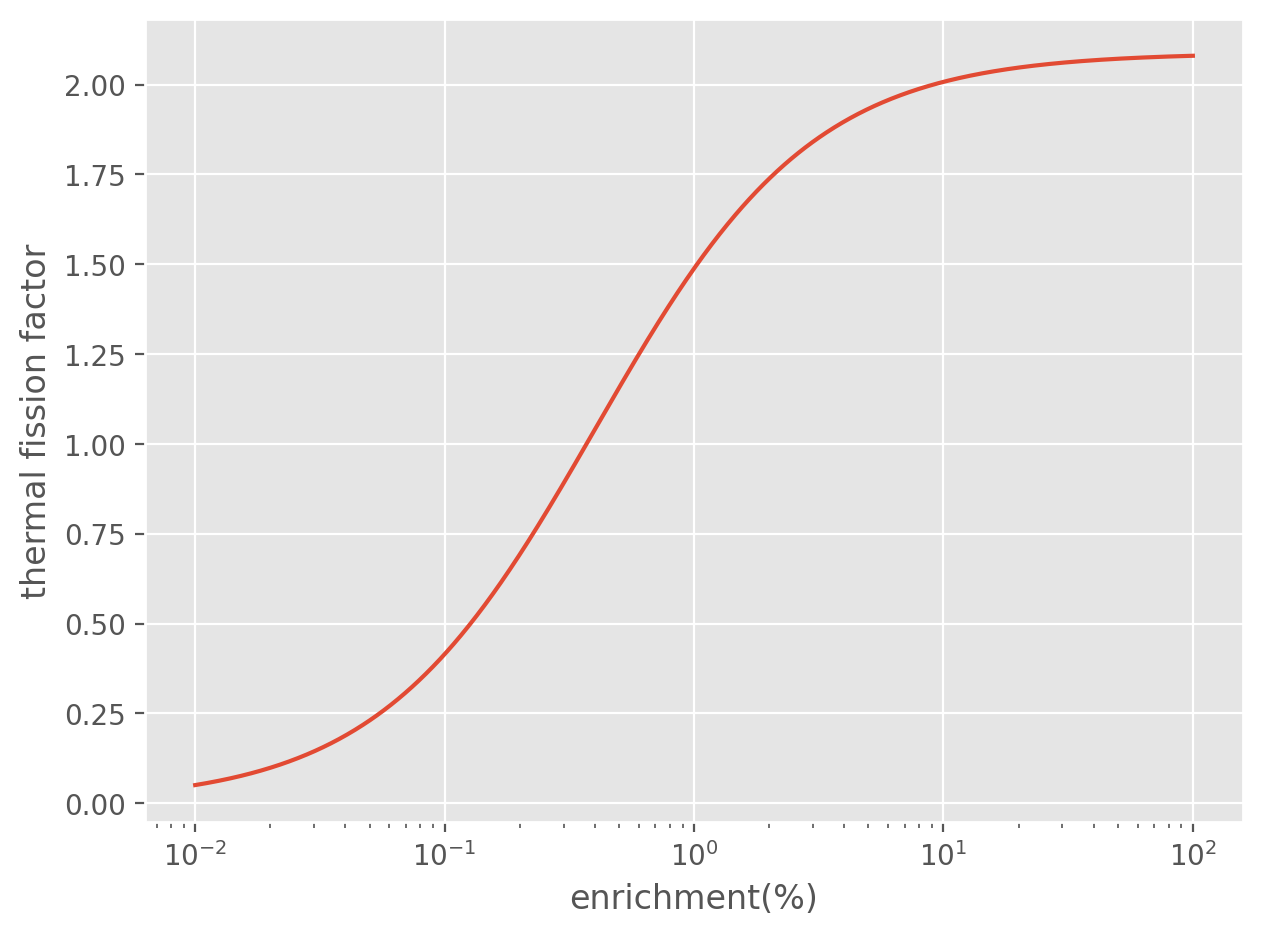

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np
# import astropy.units as u
sigma_a_235 = 592.6#*u.barn
sigma_a_238 = 2.382#*u.barn
sigma_f_235 = 505.9#*u.barn
nu235=2.4367

e = np.logspace(-4,-0,1000)
eta = nu235*sigma_f_235/(sigma_a_235+sigma_a_238*(1-e)/e)
plt.plot(e*100,eta)
plt.xlabel('enrichment(%)')
plt.xscale('log')
plt.ylabel('thermal fission factor')
plt.yscale('linear')
# plt.yticks((0,1,2))
plt.grid(True)
plt.tight_layout()
plt.savefig('hw3c_3.svg')
plt.show()

## 4

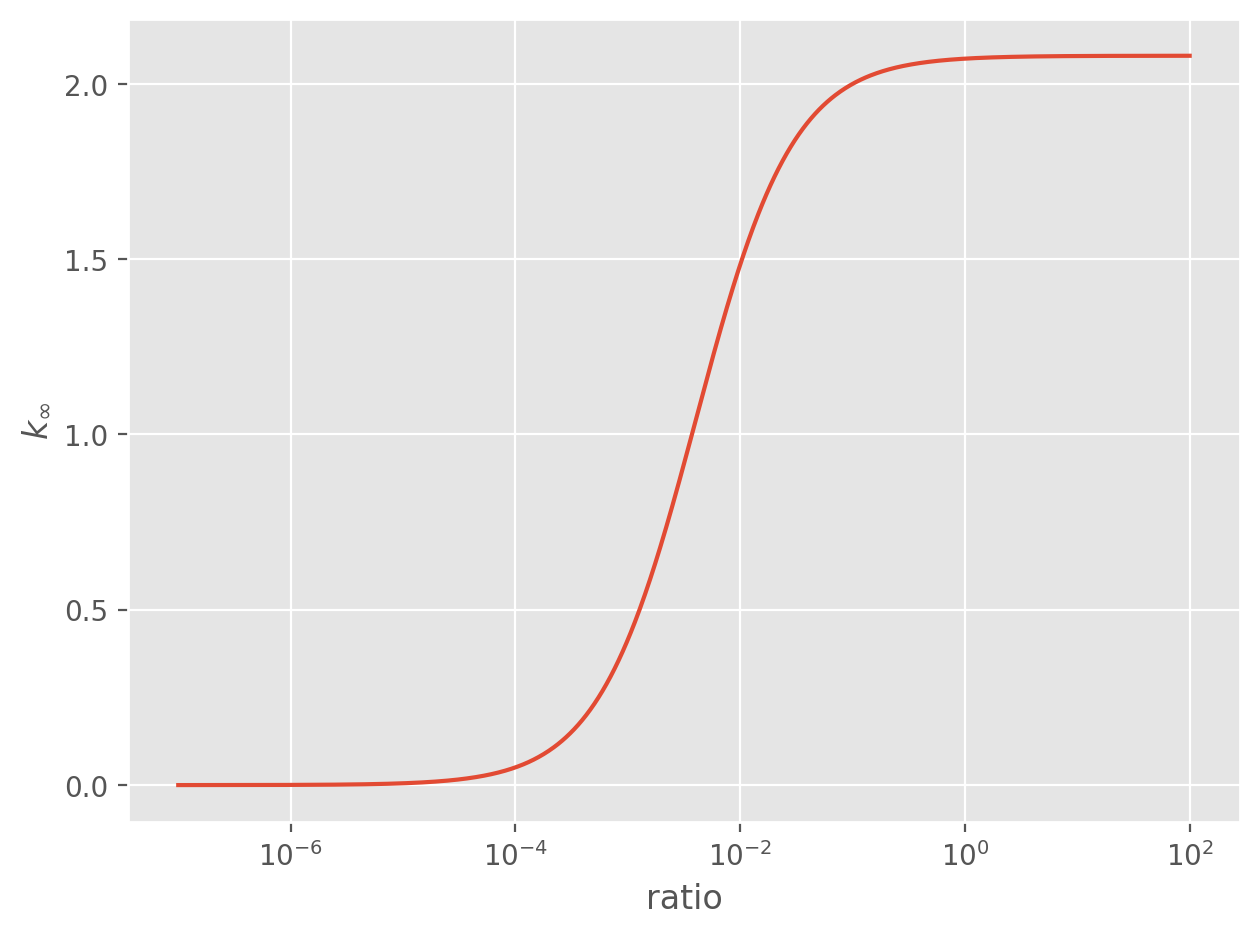

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np
# import astropy.units as u
sigma_a_235 = 592.6#*u.barn
sigma_a_C = 0.003422#*u.barn
sigma_f_235 = 505.9#*u.barn
nu235=2.4367

ratio = np.logspace(-7,2,1000)
eta = nu235*sigma_f_235/(sigma_a_235+sigma_a_238*1/ratio)
plt.plot(ratio,eta)
plt.xlabel('ratio')
plt.xscale('log')
plt.ylabel(r'$k_\infty$')
plt.yscale('linear')
# plt.yticks((0,1,2))
plt.grid(True)
plt.tight_layout()
plt.savefig('hw3c_4.svg')
plt.show()